# 📊 Manipulation des données avec Pandas  
## TP n°3 – Python pour la Science des Données  
## 🎯 Objectifs du TP

- Créer et manipuler un DataFrame Pandas
- Explorer et analyser des données tabulaires
- Filtrer, trier et transformer les données
- Appliquer des opérations statistiques simples
- Visualiser des données avec Pandas / Matplotlib
  

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = {
    "age":[22,23,26,21,26,25,24],
    "height":[157,162,179,172,169,185,171],
     "weight":[52,60,72,65,60,76,56],
      "sex":["F","M","M","M","F","M","F"]}
data

{'age': [22, 23, 26, 21, 26, 25, 24],
 'height': [157, 162, 179, 172, 169, 185, 171],
 'weight': [52, 60, 72, 65, 60, 76, 56],
 'sex': ['F', 'M', 'M', 'M', 'F', 'M', 'F']}

In [24]:
#ici on fais uniquemnt df = pd.DataFrame(data)just si on veut que les indices soit par defaut ds numeros
#par contre ici on veut que les indices soit les noms c pour ca on a les specifier
df= pd.DataFrame(data,index=["Alice","Bob","Maro","bill","Sonia","john","Lilla"])
df

,age,height,weight,sex
Alice,22,157,52,F
Bob,23,162,60,M
Maro,26,179,72,M
bill,21,172,65,M
Sonia,26,169,60,F
john,25,185,76,M
Lilla,24,171,56,F


In [25]:
#afficher lindex des lignes:renvoie lindex les lignes, par defaut c 0,1,2
print(df.index)
#afficher  lindex des collumns: renvoie les nom de colonnes
print(df.columns)
#afficher les valeurs de df
df.values

Index(['Alice', 'Bob', 'Maro', 'bill', 'Sonia', 'john', 'Lilla'], dtype='object')
Index(['age', 'height', 'weight', 'sex'], dtype='object')


array([[22, 157, 52, 'F'],
       [23, 162, 60, 'M'],
       [26, 179, 72, 'M'],
       [21, 172, 65, 'M'],
       [26, 169, 60, 'F'],
       [25, 185, 76, 'M'],
       [24, 171, 56, 'F']], dtype=object)

In [26]:
#afficher les statistiques des attributs numeriques 
#les statistiques pour les colonnes numeriques uniquemnt 
df.describe()


,age,height,weight
count,7.000000,7.000000,7.000000
mean,23.857143,170.714286,63.000000
std,1.951800,9.499373,8.582929
min,21.000000,157.000000,52.000000
25%,22.500000,165.500000,58.000000
50%,24.000000,171.000000,60.000000
75%,25.500000,175.500000,68.500000
max,26.000000,185.000000,76.000000


In [27]:
#pour tous les colonnes ou attribut y compris name et sex
df.describe(include='all')

,age,height,weight,sex
count,7.000000,7.000000,7.000000,7
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,4
mean,23.857143,170.714286,63.000000,NaN
std,1.951800,9.499373,8.582929,NaN
min,21.000000,157.000000,52.000000,NaN
25%,22.500000,165.500000,58.000000,NaN
50%,24.000000,171.000000,60.000000,NaN
75%,25.500000,175.500000,68.500000,NaN


In [28]:
#rrecuperer tous les informations concernat sonia
df.loc["Sonia"]
#alors ici normalemnt u debut j ai fais:df[df[index]=="Sonia"]] mais nous donne comme resultat un tableau avec NAN
#cela ccar les noms ici sont considerer comme index pas une valeur qu on a inserer dans notre dataframe comme age height..
#pour col on a lutiliser car on veut acceder aux lignes et aux colonnes 

age        26
height    169
weight     60
sex         F
Name: Sonia, dtype: object

In [29]:
#recuperer lage de Sonia
df.loc["Sonia"]["age"]

np.int64(26)

In [30]:
#recuperer les informations des hommes
df[df["sex"]== 'M']
#on utilise loc si on veut trouver la position just dun seul element

,age,height,weight,sex
Bob,23,162,60,M
Maro,26,179,72,M
bill,21,172,65,M
john,25,185,76,M


In [31]:
#Compter le nbr de femmes
F = (df["sex"] == 'F').sum()
F

np.int64(3)

In [32]:
#les infos de femmes de plus >23
df[(df["sex"] == "F") & (df["age"] > 23)]


,age,height,weight,sex
Sonia,26,169,60,F
Lilla,24,171,56,F


In [33]:
#afficher les colonnes age et sex
df[["age", "sex"]]



,age,sex
Alice,22,F
Bob,23,M
Maro,26,M
bill,21,M
Sonia,26,F
john,25,M
Lilla,24,F


In [34]:
#trier df par age croissant
sortdf = df.sort_values(by="age")
sortdf

,age,height,weight,sex
bill,21,172,65,M
Alice,22,157,52,F
Bob,23,162,60,M
Lilla,24,171,56,F
john,25,185,76,M
Maro,26,179,72,M
Sonia,26,169,60,F


In [35]:
#Calculer taille moyenne des ds femmes & hommes
df.groupby("sex")["height"].mean()
#mean c pour calculer la moyenne de la taille pour chaque grp


sex
F    165.666667
M    174.500000
Name: height, dtype: float64

In [36]:
#compter le nbr dindividue par sex
df["sex"].value_counts()

sex
M    4
F    3
Name: count, dtype: int64

In [37]:
#verifier les nbrs monquants
df.isnull().sum()

age       0
height    0
weight    0
sex       0
dtype: int64

In [38]:
#remplacer ls valuers de la colonne sex par des mots complet (femme et homme)
df["sex"] = df["sex"].replace({"M": "homme", "F": "femme"})
df

,age,height,weight,sex
Alice,22,157,52,femme
Bob,23,162,60,homme
Maro,26,179,72,homme
bill,21,172,65,homme
Sonia,26,169,60,femme
john,25,185,76,homme
Lilla,24,171,56,femme


In [39]:
#selectionner les individus dans la taille est compris entre 130 et 170
df[(df["height"] >= 130) & (df["height"] <= 170)]


,age,height,weight,sex
Alice,22,157,52,femme
Bob,23,162,60,homme
Sonia,26,169,60,femme


In [40]:
#affficher lindividus le plus grande
df.loc[df["height"].idxmax()]


age          25
height      185
weight       76
sex       homme
Name: john, dtype: object

In [41]:
#ajouter une nouvelle colonne bmi calculer par la formule bmi = wight / height^2
#on a transfer le cm en m
df["bmi"] = df["weight"] / (df["height"] / 100) ** 2
df


,age,height,weight,sex,bmi
Alice,22,157,52,femme,21.096191
Bob,23,162,60,homme,22.862369
Maro,26,179,72,homme,22.471209
bill,21,172,65,homme,21.971336
Sonia,26,169,60,femme,21.007668
john,25,185,76,homme,22.205990
Lilla,24,171,56,femme,19.151192


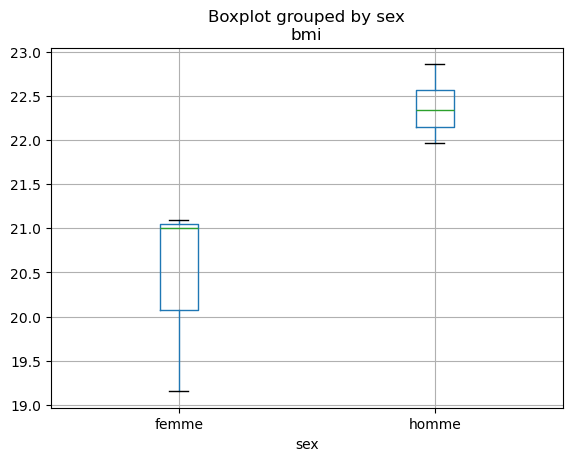

In [43]:
#Comparer le BMI (boxplot)
df.boxplot(column="bmi", by="sex")
plt.show()


In [44]:
#Exporter en CSV
df.to_csv("personnes.csv", index=False)
